## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# import libraries needed for the project 

import pandas as pd
import numpy as np


In [2]:
# open the data file

data = pd.read_csv('./data/kc_house_data.csv')


## Data explorations

In [3]:
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From this first screening, we can see that sqft_basement is an object, so we convert it into float. But when we try to apply the function astype, it gives an error. That's why we have to epxlore the oclumn a little further. By reading the corresponding error of astype and using the function .value_counts() we can see that the problem is that there is the sign "?". 


In [5]:

data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

To proceed with our analysis, we could detete the raws that contain "?", but then we will be losing 454 data points. Consiering that we have 21596 entries, 454 points correspond to a 2.1% of the points. As we want to do the best regression model and consider all the variables, we proceed to delte the values containing "?"

In [6]:
data = data[(data.sqft_basement != '?' )]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     18804 non-null  float64
 9   view           21082 non-null  float64
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  object 
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   17389 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

We can see that now we have 21143 entries 

In [7]:
data['sqft_basement'] = data['sqft_basement'].astype(str).astype(float)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     18804 non-null  float64
 9   view           21082 non-null  float64
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   17389 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

Above we have confirm that the sqft_basement is now a float.
And we also convert the date to a datetime format

In [9]:
#data['date'] = pd.to_datetime(data['date']).head()
#data.info()

To put a bit more of context, would be great to know where the houses are located. So let's explore the postcodes

In [10]:
data['zipcode'].value_counts()

98103    588
98038    574
98115    568
98052    562
98042    542
        ... 
98102    100
98010     98
98024     79
98148     55
98039     49
Name: zipcode, Length: 70, dtype: int64

In [11]:
data.sort_values('zipcode')

id        date     price  bedrooms  bathrooms  sqft_living  \
17259  2460500020   3/30/2015  305000.0         4       1.75         2370   
11919  3329530030    3/4/2015  271920.0         3       2.00         1410   
1915   3874000240   12/2/2014  210000.0         3       2.00         1440   
14423  8159610150  11/17/2014  234950.0         3       2.00         1510   
14422  2154900330   8/27/2014  234000.0         4       2.50         1820   
...           ...         ...       ...       ...        ...          ...   
11473   207500012    5/5/2014  855000.0         4       2.75         2600   
1960   1370802650   7/29/2014  605000.0         3       2.00         2660   
11502  1377800135    4/2/2015  676000.0         3       2.00         1730   
3850   1877500090   2/11/2015  756000.0         3       2.50         3560   
6030   2770606890    8/7/2014  450000.0         4       1.75         1520   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
17259     10140     1.0         0.0   0.0  ...      7        1460   
11919     10248     1.0         NaN   0.0  ...      7        1410   
1915      10111     1.0         0.0   0.0  ...      7        1440   
14423      9153     1.0         0.0   0.0  ...      7        1510   
14422      8217     1.0         0.0   0.0  ...      7        1120   
...         ...     ...         ...   ...  ...    ...         ...   
11473      5390     1.0         NaN   0.0  ...      8        1300   
1960       4500     1.0         0.0   0.0  ...      7        1330   
11502      6784     2.5         0.0   0.0  ...      7        1730   
3850       8297     1.0         0.0   2.0  ...      8        1650   
6030       5250     1.0         0.0   0.0  ...      6        1520   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
17259          910.0      1968           0.0    98001  47.3352 -122.278   
11919            0.0      1985           0.0    98001  47.3315 -122.265   
1915             0.0      1963           0.0    98001  47.3450 -122.283   
14423            0.0      1974           0.0    98001  47.3412 -122.273   
14422          700.0      1987           0.0    98001  47.2630 -122.242   
...              ...       ...           ...      ...      ...      ...   
11473         1300.0      1960           NaN    98199  47.6382 -122.397   
1960          1330.0      1922           0.0    98199  47.6391 -122.403   
11502            0.0      1942           0.0    98199  47.6462 -122.403   
3850          1910.0      1948           0.0    98199  47.6473 -122.407   
6030             0.0      1949           0.0    98199  47.6581 -122.390   

       sqft_living15  sqft_lot15  
17259           1450        7800  
11919           2090        9414  
1915            1580       10200  
14423           1780        9286  
14422           1310        8217  
...              ...         ...  
11473           2550        5600  
1960            1790        5000  
11502           1210        6784  
3850            2760        8297  
6030            1530        5250  

[21143 rows x 21 columns]

Exploring the zipcodes, it feels that we are talking about houses in Washington state, usa

## Categorical variables

One of the next steps will be to unesrtand which columns containg categorical values, and for this reason we create a scateter plot against price (which is our variable of interest)

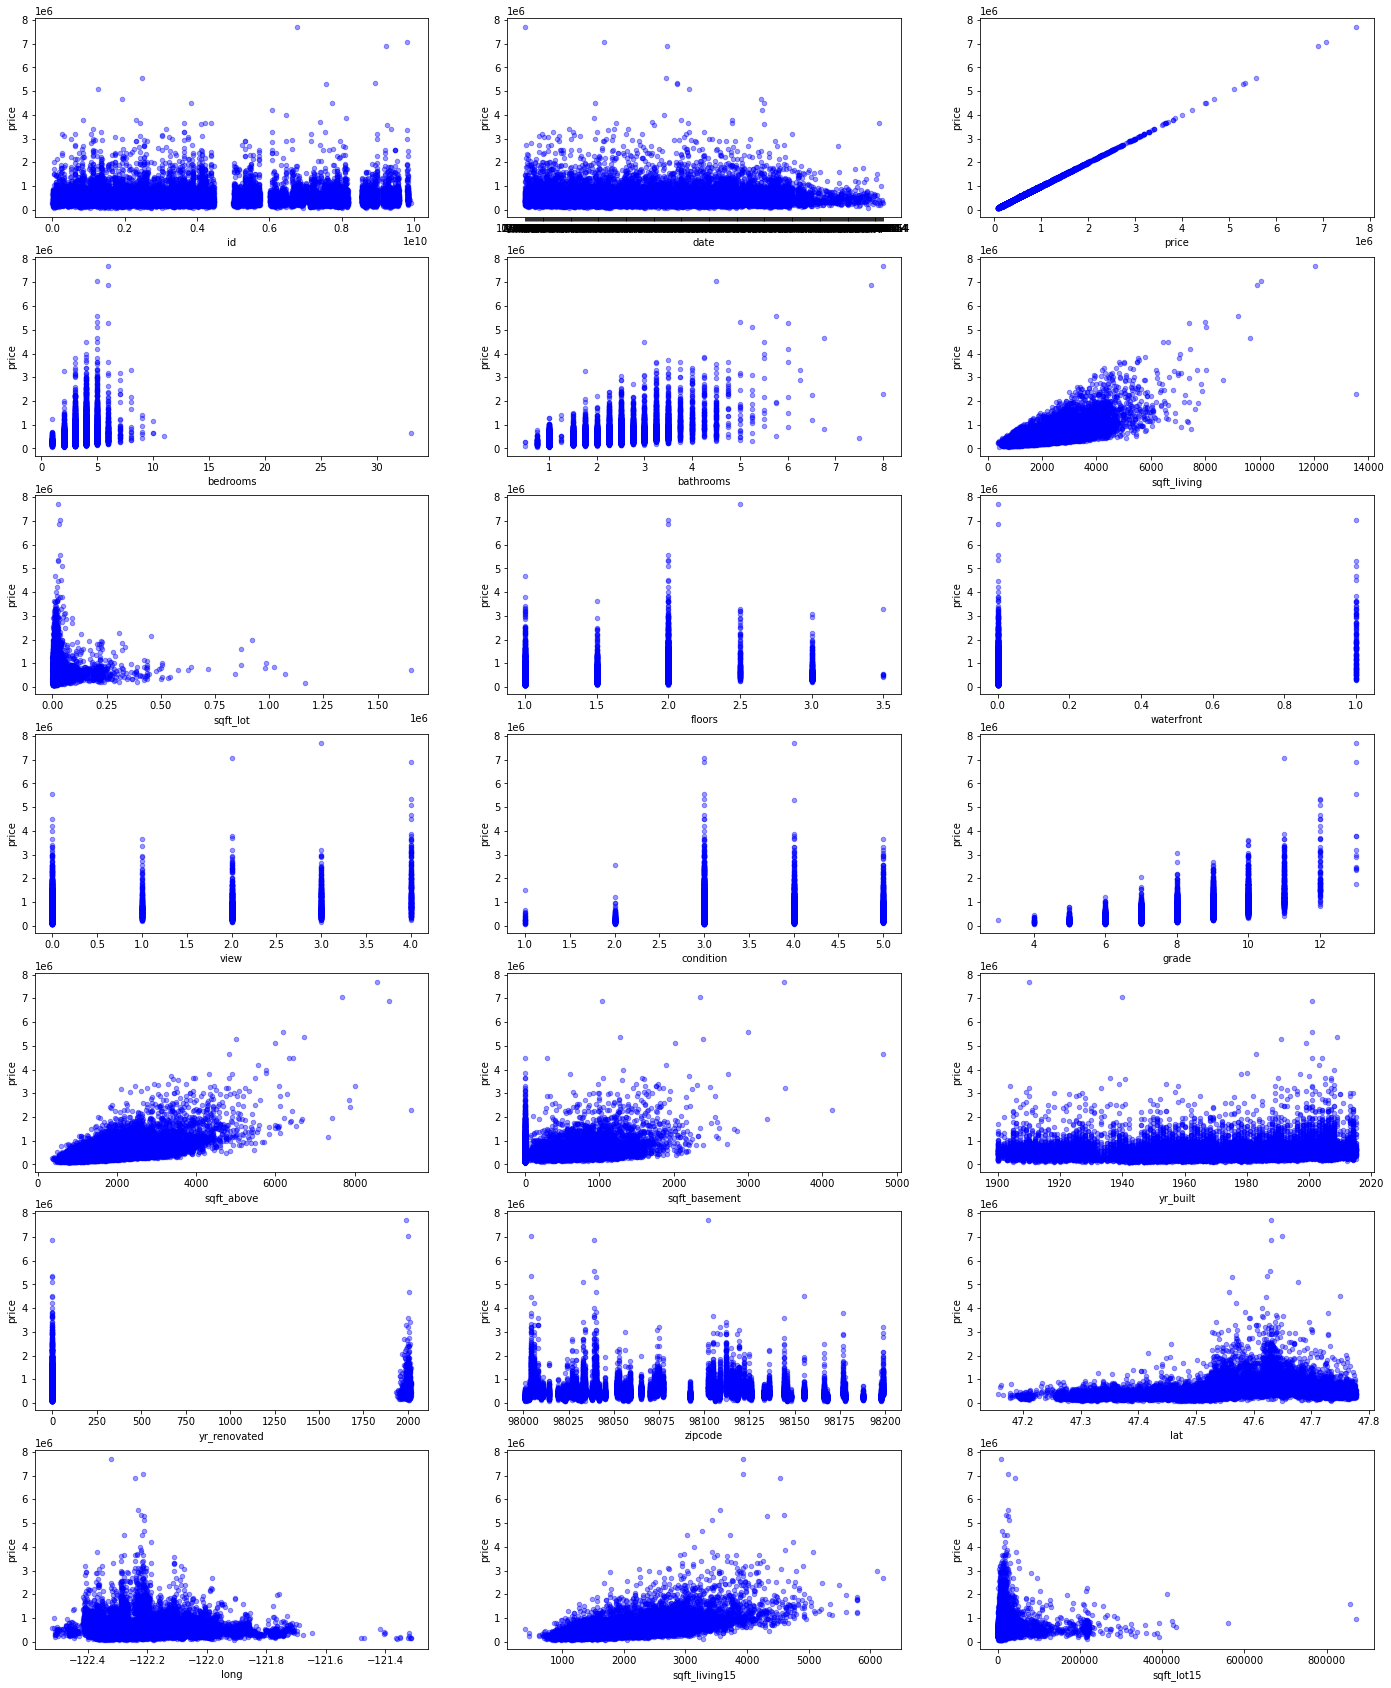

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

 # crate the figure and axes
fig, axes = plt.subplots(7, 3, figsize=(24, 30))   

# unpack all the axes subplots
axe = axes.ravel()

# assign the plot to each subplot in axe
for i, c in enumerate(data.columns):
    
    data.plot(kind='scatter', x=c, y='price', ax=axe[i], alpha=0.4, color='b')

From these graphs and the information enclosed in the document column_names, we can conclude that "Waterfront", "view", "condition", "grade" and "zipcode" are categorical values

In [13]:
data.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [23]:
continuous_norm = ['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'sqft_above', 'yr_built', 'lat', 'sqft_living15', 'sqft_lot15' ]
categoricals_temp = ['waterfront', 'view', 'condition', 'grade']
continous_no_norm = ['sqft_basement', 'yr_renovated', 'long']


#sqft_basement, yr_renovated, long -> I remove these 3 because they have 0 and I can

In [15]:
#data_ohe = pd.get_dummies(data[categoricals], prefix=categoricals, drop_first=True)

waterfront_dummies = pd.get_dummies(data['waterfront'], prefix='wf', drop_first=True)
view_dummies = pd.get_dummies(data['view'], prefix='vw', drop_first=True)
condition_dummies = pd.get_dummies(data['condition'], prefix='cd', drop_first=True)
grade_dummies = pd.get_dummies(data['grade'], prefix='grade', drop_first=True)


In [16]:
waterfront_dummies = pd.get_dummies(data['waterfront'], prefix='wf', drop_first=True)
view_dummies = pd.get_dummies(data['view'], prefix='vw', drop_first=True)
condition_dummies = pd.get_dummies(data['condition'], prefix='cd', drop_first=True)
grade_dummies = pd.get_dummies(data['grade'], prefix='grade', drop_first=True)


data2 = data.drop(['waterfront','view','condition','grade'], axis=1)
data2 = pd.concat([data['price'], waterfront_dummies, view_dummies, condition_dummies, grade_dummies], axis=1)
data2.head(10)

price  wf_1.0  vw_1.0  vw_2.0  vw_3.0  vw_4.0  cd_2  cd_3  cd_4  cd_5  \
0    221900.0       0       0       0       0       0     0     1     0     0   
1    538000.0       0       0       0       0       0     0     1     0     0   
2    180000.0       0       0       0       0       0     0     1     0     0   
3    604000.0       0       0       0       0       0     0     0     0     1   
4    510000.0       0       0       0       0       0     0     1     0     0   
5   1230000.0       0       0       0       0       0     0     1     0     0   
7    291850.0       0       0       0       0       0     0     1     0     0   
8    229500.0       0       0       0       0       0     0     1     0     0   
9    323000.0       0       0       0       0       0     0     1     0     0   
10   662500.0       0       0       0       0       0     0     1     0     0   

    grade_4  grade_5  grade_6  grade_7  grade_8  grade_9  grade_10  grade_11  \
0         0        0        0        1        0        0         0         0   
1         0        0        0        1        0        0         0         0   
2         0        0        1        0        0        0         0         0   
3         0        0        0        1        0        0         0         0   
4         0        0        0        0        1        0         0         0   
5         0        0        0        0        0        0         0         1   
7         0        0        0        1        0        0         0         0   
8         0        0        0        1        0        0         0         0   
9         0        0        0        1        0        0         0         0   
10        0        0        0        0        1        0         0         0   

    grade_12  grade_13  
0          0         0  
1          0         0  
2          0         0  
3          0         0  
4          0         0  
5          0         0  
7          0         0  
8          0         0  
9          0         0  
10         0         0

In [20]:
data.sqft_basement.value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [21]:
 data.yr_renovated.value_counts()


0.0       16666
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1959.0        1
1951.0        1
1976.0        1
1953.0        1
1948.0        1
Name: yr_renovated, Length: 69, dtype: int64

In [22]:
 data.long.value_counts()



-122.290    113
-122.300    109
-122.362    104
-122.363     98
-122.291     98
           ... 
-121.724      1
-121.691      1
-122.514      1
-121.646      1
-121.403      1
Name: long, Length: 750, dtype: int64

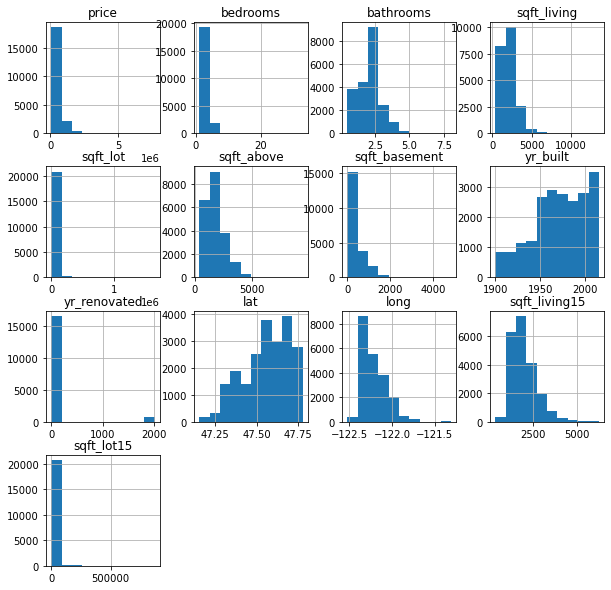

In [17]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data[continuous].hist(ax = ax);

In [24]:
# Log transform and normalize
data_cont = data[continuous_norm]

# log features
log_names = [f'{column}_log' for column in data_cont.columns]
data_log = np.log(data_cont)
data_log.columns = log_names
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)

data_log_norm.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price_log          21143 non-null  float64
 1   bedrooms_log       21143 non-null  float64
 2   bathrooms_log      21143 non-null  float64
 3   sqft_living_log    21143 non-null  float64
 4   sqft_lot_log       21143 non-null  float64
 5   sqft_above_log     21143 non-null  float64
 6   yr_built_log       21143 non-null  float64
 7   lat_log            21143 non-null  float64
 8   sqft_living15_log  21143 non-null  float64
 9   sqft_lot15_log     21143 non-null  float64
dtypes: float64(10)
memory usage: 1.8 MB


In [ ]:
X = data2.drop('price', axis=1)
y = data2['price']

In [ ]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

In [ ]:
categoricals = pd.concat([waterfront_dummies, view_dummies, condition_dummies, grade_dummies])

categoricals

There are lots of nans, so what I am going to do is delet the values that have NaN. And then run the model. And then if there are some that are not interested, I will delete them so I can have more values
    

In [ ]:
data.info()

In [ ]:
next_data2 = data.dropna(axis=0)
next_data2

In [ ]:
waterfront_dummies = pd.get_dummies(next_data2['waterfront'], prefix='wf', drop_first=True)
view_dummies = pd.get_dummies(next_data2['view'], prefix='vw', drop_first=True)
condition_dummies = pd.get_dummies(next_data2['condition'], prefix='cd', drop_first=True)
grade_dummies = pd.get_dummies(next_data2['grade'], prefix='grade', drop_first=True)

categoricals2 = pd.concat([waterfront_dummies, view_dummies, condition_dummies, grade_dummies])

categoricals2


In [ ]:
data_cont = data[continuous]

In [ ]:
data_cont

In [ ]:
preprocessed = pd.concat([data_cont, categoricals])
preprocessed

In [ ]:
X = preprocessed.drop('price', axis=1)
y = preprocessed['price']

In [ ]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()